# DS 3000 HW 6

Due: Mon Mar 29 @ 11:59 PM EST

### Submission Instructions
Submit this `ipynb` file to gradescope.

The `ipynb` format stores outputs from the last time you ran the notebook.  (When you open a notebook it has the figures and outputs of the last time you ran it too).  To ensure that your submitted `ipynb` file represents your latest code, make sure to give a fresh run "Kernel > Restart & Run All" just before uploading the `ipynb` file to gradescope.

### Academic Integrity

**Writing your homework is an individual effort.**  You may discuss general python problems with other students but under no circumstances should you observe another student's code which was written for this assignment, from this year or past years.  Pop into office hours or post a piazza note if you have a specific question about your work you'd like another pair of eyes to talk through.  (Remember, mark your piazza note private if it contains anything which may be considered a solution to the exercise).

Don't forget to cite websites which helped you solve a problem in a unique way.  You can do this in markdown near the code or with a simple one-line comment.  For example, a python trick I find particularly clever (and useful, sometimes):

```python
from collections import defaultdict

def tree(): 
    # https://gist.github.com/hrldcpr/2012250
    return defaultdict(tree)
```

You need not cite the official python documentation or the documentation of any python library which is imported in the template (e.g. matplotlib, numpy, scipy).

**Documentation / style counts for credit**  Please see our course's python style guide, available on canvas, for further information.


## Part 1 (22 points)

Match each of the covariance matrices to the dataset which is most consistent.  Note that all scatterplots below have equal scales in the x and y axes (moving an inch to the right increases x as much as moving an inch up increases y).  

Please express your response as list, ordered alphabetically by dataset.  For example, you might respond with:

- Data Set A = $\Sigma_0$
- Data Set B = $\Sigma_1$
- Data Set C = $\Sigma_2$
- Data Set D = ...

(If you'r eunsure how to format a "Sigma" in Latex, double click this markdown cell and examine the source which generated the list above)

<img src="https://i.ibb.co/K7DY3mx/cov3by3.png" alt="Drawing" style="width: 600px;"/>


$$\Sigma_0 =\begin{bmatrix} 
5 & 1\\ 
1 & 2
\end{bmatrix}, 
\Sigma_1 =\begin{bmatrix} 
4 & 0\\ 
0 & 0
\end{bmatrix}, 
\Sigma_2 =\begin{bmatrix} 
1 & -1\\ 
-1 & 7
\end{bmatrix}, 
\Sigma_3 =\begin{bmatrix} 
7 & 4\\ 
4 & 5
\end{bmatrix}, 
\Sigma_4 =\begin{bmatrix} 
5 & 3\\ 
3 & 2
\end{bmatrix}$$

$$\Sigma_5 =\begin{bmatrix} 
6 & 2\\ 
2 & 6
\end{bmatrix}, 
\Sigma_6 =\begin{bmatrix} 
4 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_7 =\begin{bmatrix} 
1 & -2\\ 
-2 & 5
\end{bmatrix}, 
\Sigma_8 =\begin{bmatrix} 
2 & 0\\ 
0 & 2
\end{bmatrix}$$

- Data Set A = 4
- Data Set B = 7
- Data Set C = 5
- Data Set D = 8
- Data Set E = 3
- Data Set F = 6
- Data Set G = 1
- Data Set H = 0
- Data Set I = 2

# Part 2: New COVID-19 cases, Scale in Covariance Matrices (12+1 points)

This problem uses `covid_data.csv` which measures the total new daily COVID cases each day in Massachusetts, California and NEU.  So if `MA` is 1 on 3/16/2021, then we know that there 1 reported COVID case on 3/16/2021.

In [1]:
import pandas as pd

df_covid = pd.read_csv('covid_data.csv', index_col='date')

In [2]:
df_covid.cov()

,MA,CA,NEU
MA,4.217750e+06,2.351385e+07,6864.562272
CA,2.351385e+07,1.980773e+08,40762.364969
NEU,6.864562e+03,4.076236e+04,30.653335


A younger version of yourself, before having mastered Correlation and Covariance as you now have, may have had the following reasoning:

    "The covariance between MA and CA is about 23 million, which is much larger than the covariance between CA and NEU (about 4 thousand).  Therefore, I conclude that infections in MA and CA must change more consistently together than CA and NEU."

Identify and correct your past self's interpretation mistake by offering a more principled analysis of what relationships do and don't exist in the data.

To receive full credit on this question, be sure to:
- correctly identify the thinking error:
    - why is cov(MA, CA) > cov(CA, NEU)? 
        - (use might use your `.head()` to do some thinking!)
    - what should we use to measure the consistency with which values change?
- clearly explain / teach the difference so that a non-technical audience may understand
- utilize whatever features of the python libraries we've studied you see fit to explain yourself

Be clear.  Be brief.

Bonus (+1 point): Hypothesize why NU's relationship to the other states is different than between MA and CA.

## Answer
The problem with this interpretation is that covariance does not take into account the size of the numbers being considered. Because the populations of Massachusetts and California are bigger than the population of California and NEU, the covariance is naturally bigger, but that does not mean the correlation between California and Massachusetts is greater than the correlation between California and NEU.

### Bonus
The population size of California and Massachusetts are much larger than than population of NEU. Typically in normally distributed data, the bigger the sample size, the closer the data will be towards normal distribution. It will be more accurate in evaluating hypotheses when there is more data to work with.

# Part 3: New COVID-19 cases, Demonstrating a changing rate (30 points: 6 pts per subpart)

We seek to understand if the number of new cases changed when thanksgiving occured.  Namely, we test the following hypothesis for each location:

    H_1: The average number of new COVID cases per day is different between the 3 weeks before (11/5 - 11/25 inclusive) and the 3 weeks after (11/27 - 12/16 inclusive)  Thanksgiving
    
Suggestions for dealing with ranges of dates:
- use the fact that the data is reverse chronologically sorted
    - newer entries at the top of the dataframe, older dates towards the bottom
- dates must be in `datetime` for nice axis formatting (part 3.1)
    - use `pd.to_datetime()` to cast a column to datetime
        - doesn't work on an index though ... how do we `reset_index()` back to a column again?
- you may find it easier to use the dates as strings so you can reference a row as without dealing with `datetime`:
```python
df_covid.loc['2020-11-25', :]
```
    - feel free to reload the data for part 3.2 after you've completed the plotting of part 3.1 so you'll have the dates as a string index, rather than a datetime column
   

In [3]:
df_covid.head()

,MA,CA,NEU
date,,,
2021-03-03,1899,3352,11
2021-03-02,301,2533,10
2021-03-01,1395,3516,11
2021-02-28,1468,4685,7
2021-02-27,1700,5151,4


## Part 3.1
Before starting the analysis make some 'sanity-check' plots to see what the data looks like.  Plot the new cases from 11/5 to 12/16 (inclusive) in any way you see fit.

- Because the scale of each location may vary, its easier to make a seperate plot per location.  Please do.
- these graphs don't need to look great, they're just for you to find any anomolies before you send the data into the analysis

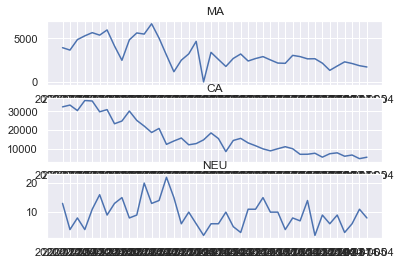

In [4]:
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns

sns.set()

# resets the index of the covid dataframe
df_covid_ir = df_covid.reset_index()

# enumerates locations that were tested
locations = ['MA', 'CA', 'NEU']

# grabs the dates to be observed
weeks_aft_tg = df_covid_ir.loc[78:119, :]
#weeks_aft_tg

# loops through locations
for i in range(len(locations)):

    # creates subplot for three locations
    plt.subplot(3, 1, i + 1)
    
    # plots the date against the positive cases count
    plt.plot(weeks_aft_tg['date'], weeks_aft_tg[locations[i]])

    plt.gca().title.set_text(locations[i])
    #plt.ylim(0, 10000)

# do just the dates between ^^^

## Part 3.2
Identify the appropriate test from the three we studied in class:
- Pearson's R
- T-Test (unpaired samples)
- T-Test (paired samples)
    

We need to use the T-Test for paired samples. We are given a hypothesis, which is better tested using the T-Test. Since we are observing the same population of students, we use the paired sample version because these groups are not independent.

## Part 3.3
List and qualitatively evaluate all assumptions for your selected test (no need to call the functions shown in class to check assumptions).

### Answer
- The dependent variable must be continuous in terms of data being based on an incremental basis.
- The observations are independent of each other.
- The dependent variable should be approximately normally distributed.
- The data was collected using simple random sampling, or in a manner in which every observation in the population had an equal chance to be included in the sample.

## Part 3.4
Produce a p-value for each location by
- collecting the appropriate data from `df_covid`
- feeding it into the appropriate function from `scipy.stats`
- printing a statement to the command line which lists the location (MA, CA or NU) as well as the pvalue

Be sure to use a loop rather than copy/pasting code to perform the task at every location:
```python
for location in df.columns:
    # compute that pvalue!
```

In [5]:
from scipy import stats

# grabs the data from data before Thanksgiving
df_covid_ir['pre'] = np.where((df_covid_ir['date'] > '2020-11-05')
                            & (df_covid_ir['date'] <= '2020-11-25'), 1, 0)
# grabs the data from data after Thanksgiving
df_covid_ir['post'] = np.where((df_covid_ir['date'] >= '2020-11-27')
                             & (df_covid_ir['date'] <= '2020-12-16'), 1, 0)

# loops through the locations and calculats the p-value
for location in df_covid_ir[locations]:
    # computes pvalues for pre and post covid data
    df_covid_pre = df_covid_ir.where(df_covid_ir['pre']==1).dropna()[location]
    df_covid_post = df_covid_ir.where(df_covid_ir['post']==1).dropna()[location]
    
    print(stats.ttest_rel(df_covid_pre, df_covid_post))

Ttest_relResult(statistic=-8.443487218716923, pvalue=7.451818442119927e-08)
Ttest_relResult(statistic=-9.585762490089296, pvalue=1.0358057278906983e-08)
Ttest_relResult(statistic=-2.984043142649831, pvalue=0.007626313752017159)


## Part 3.5
Summarize the meaning of these three p-values for a non-technical audience
- no need to discuss rejecting / not-rejecting the null hypothesis
- just tell us what the p-values are suggesting and how strongly they suggest it

### Answer
The p-value is a measure of how likely an observed deviation or difference in the sample is due to random chance or is legitimate. Sampling is recognized to not be perfect, so the p-value takes into account descriptive statistics of the sample data, such as sample mean and standard deviation, to determine how likely observations could be attributed to errors. The smaller the p-value, the more likely the difference is NOT due to chance, or is significant.

## Part 3.6 (+2 bonus)
If we're testing all 3 hypothesis (one per location) as the same time, is it [appropriate](https://xkcd.com/882/) to declare any of them significant because they're associated p-value is less than $\alpha=.05$?  Justify your thinking so a non-technical reader can understand.

### Answer
At an alpha level of 0.05, we would be assuming that every sample taken will have type I errors with 5% of the data, or an error where the COVID test returned true when it was false. That is a very high chance of many of our observations being erroneous. We would want to lower our alpha in order to check for even stricter significance to make sure our hypothesis is rigorously exercised.

# Part 4: Classifying Metal (36+3 points: 8, 20, 8, +3)

To the un-initiated ear all metal music might sound similar but there are a variety of genres, each with characteristic elements. In this exercise we will build a kNN classifier to distinguish between the three metal genres listed below.

**Content warning:** metal music is rather extreme and the lyrics can be explicit and troubling.  You needn't listen to the music below to complete and understand this DS exercise.   

* **metalcore** is characterised by yelling and screaming vocals and stop/start rythm guitar playing. It has influences of punk and hardcore. See ["When I Lost My Bet"](https://open.spotify.com/track/4QNrAao1rDm5XcThnAYEOj) by The Dillinger Escape Plan
* **death metal**: is characteristed by growling vocals and downtuned guitars played with a lot of palm muting. It developed from thrash metal. See ["Pull the Plug"](https://open.spotify.com/track/2l0h4aBFLp9HdoaNdCTlbW) by Death
* **heavy metal**: is an umbrella-genre, with metalcore and death metal being more specific subgenres. We'd expect that if something is tagged as heavy metal it might not have a better fitting label. See ["Paranoid"](https://open.spotify.com/track/1Y373MqadDRtclJNdnUXVc) by Black Sabbath

## Part 4.1
- load the `spotify_metal_genre_simple.csv` dataset
    - each row is its own song
- plot the pairwise feature scatter plots using `sns.pairplot`
- Using the pairplot above give one or two of the most distinguishing characteristics of each metal genre.  For example, you might say that:

        Death metal is typically newer & more danceable more danceable than the other genres

(Note: the statement immediately above is an example characterization which may or may not be accurate)

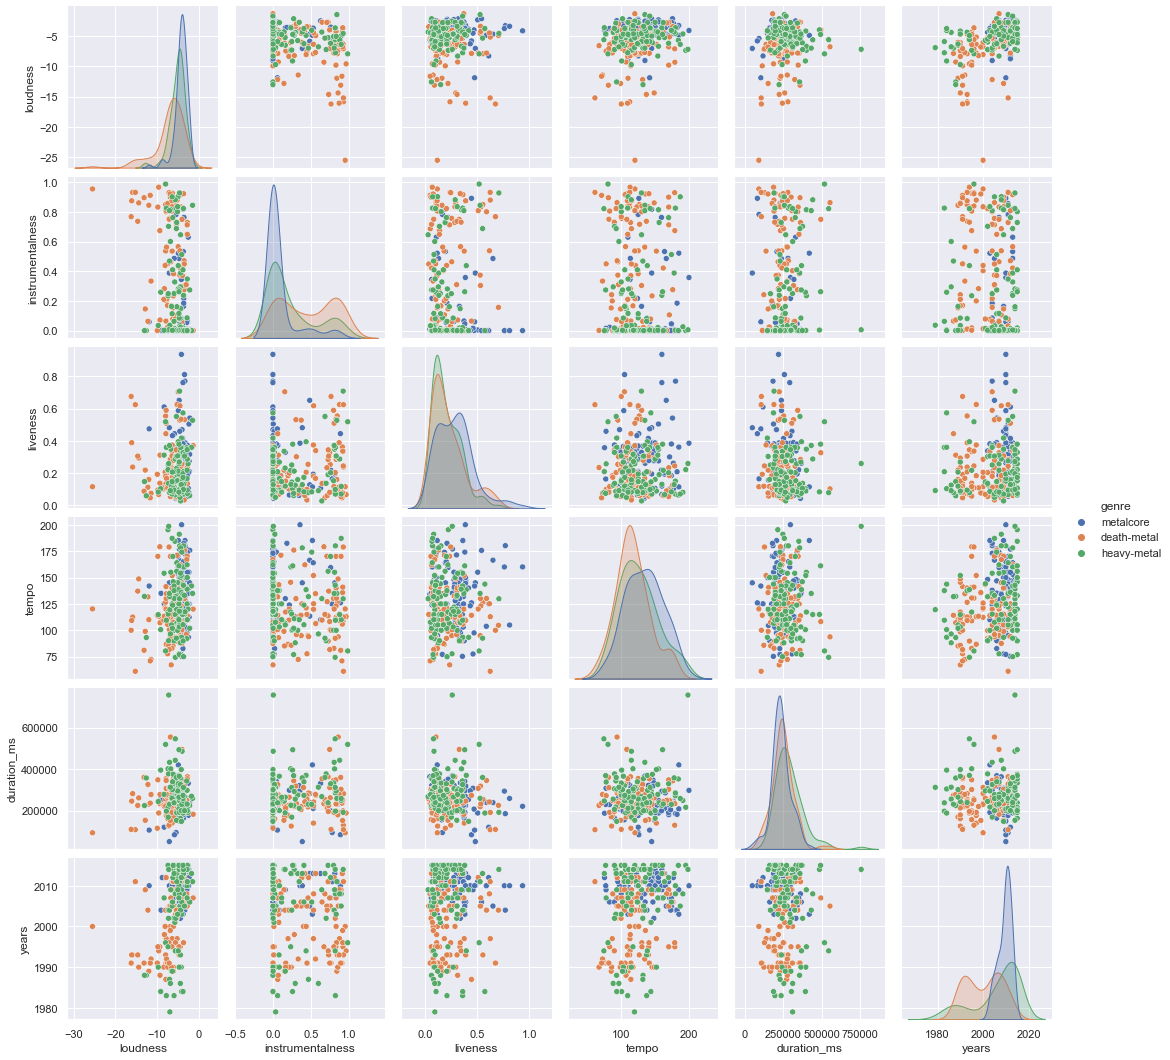

In [6]:
import pandas as pd
import numpy as np

df_spotify_metal = pd.read_csv('spotify_metal_genre_simple.csv')
# creates pairplot using spotify DataFrame on metal songs
sns.pairplot(df_spotify_metal, hue='genre')

- Heavy-metal: more recent heavy-metal songs tend to be shorter than earlier heavy-metal songs.
- Death-metal: death-metal is typically not as loud as the other two genres.
- Metalcore: Faster metalcore songs tend to be more live than the other two genres.

## Part 4.2
* divide the data into the `X` (features) and `y` (labels) arrays 
* normalize the data (see scale normalization)
* using 10-fold cross validation, plot a confusion matrix for each metal subgenre classifier below:
    - 1-NN classifier
    - 5-NN classifier
    - 11-NN classifier
    - 15-NN classifier
    - 27-NN classifier
    - 71-NN classifier
    
(Be sure to use a loop to handle each of the distinct `k` above:)
```python
for k in (1, 5, 11, 15, 27, 71):
    # train / eval k-NN classifer
```
* For each classifier above, save the confusion matrix in dictionary so we can refer to them later.  To save the 1-NN classifier:
```python
conf_matrix_dict[1] = conf_matrix
```
    

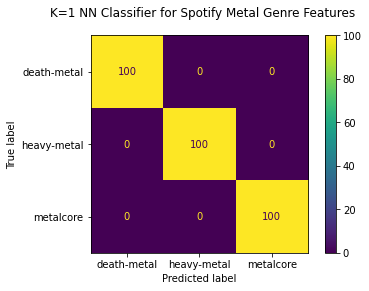

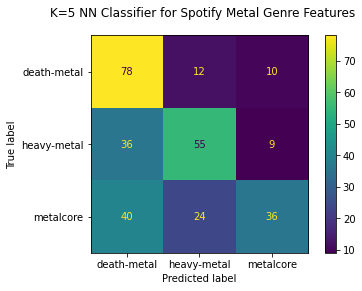

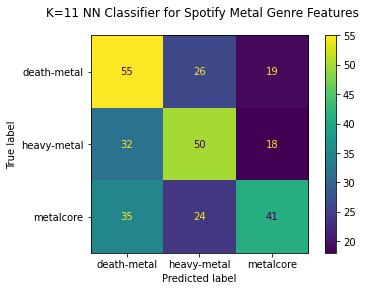

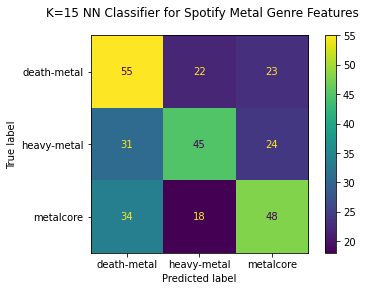

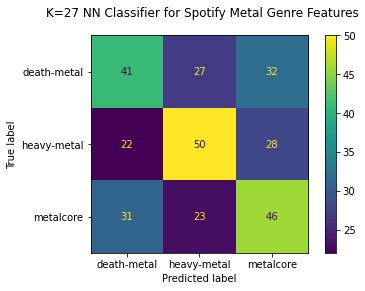

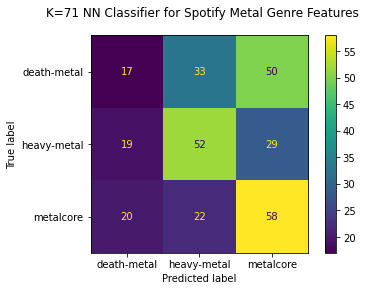

In [7]:
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np

conf_matrix_dict = dict()

n_splits = 10
x_features = ['loudness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'years']
y_feat = 'genre'

for k in (1, 5, 11, 15, 27, 71):

    x = df_spotify_metal.loc[:, x_features].values
    y_true = df_spotify_metal.loc[:, y_feat].values
    #x[:5, :]

    # initialize a knn_classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # fit happens "inplace", we modify the internal state
    knn_classifier.fit(x, y_true)

    # estimate each penguin's species
    y_pred = knn_classifier.predict(x)

    conf_mat = confusion_matrix(y_true=y_true, y_pred=y_pred)
    #conf_mat
    
    # 
    conf_matrix_dict[k] = conf_mat
    
    # plot confusion matrix
    conf_mat_disp = ConfusionMatrixDisplay(conf_mat, display_labels=np.unique(y_true))
    
    sns.reset_orig()
    conf_mat_disp.plot()
    plt.suptitle(f'K={k} NN Classifier for Spotify Metal Genre Features')

## Part 4.3
- Using the `conf_matrix_dict` above, compute the accuracy of each of the classifiers (proportion of all samples correctly predicted).  The accuracies will probably be slightly different, explain any major differences or state that all values of k tested produce equally accurate results.
    - `np.diag()` extracts the diagonal entries of a matrix
    - `x.sum()` adds all entries of matrix `x` together
- By observing the confusion matrices, which pair of the metal genres appears to be most distinct?  
- Which metal genre is most difficult to distinguish and why?
    - hint: read the descriptions of the metal genres
    
    

In [8]:
import numpy as np

conf_mat_accuracies = []

for key in conf_matrix_dict:
    
    # calculates proportion of classifications that were right for each matrix
    fold_accuracy = np.diag(conf_matrix_dict[key]).sum() / conf_matrix_dict[key].sum()
    
    # appends proportion to list
    conf_mat_accuracies.append(fold_accuracy)

conf_mat_accuracies

[1.0,
 0.5633333333333334,
 0.4866666666666667,
 0.49333333333333335,
 0.45666666666666667,
 0.42333333333333334]

It seems that heavy metal and metalcore are the pair of most distinct genres among the three genres. The values between true labels and predicted labels between these two genres are typically the least among the matrix, meaning they are typically least often confused for each other.

Heavy metal seems to be the most difficult genre to distinguish. It is an umbrella-term genre and includes the other two as subgenres.

## Part 4.4 (bonus)
Scale normalization, as implemented in the class notes, violates the "seperation of training and testing data" which motivated Cross Validation.  Explain how you might resolve this issue in practice.  
- Feel free to use this data as an example
- There isn't any need to implement this improvement, Part 4.2 may make this "error" and receive full credit